# Random Order- and SKU generators

## Importing libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skewnorm

%matplotlib inline

## Random SKU table generation

### Objectives
Generate a table with unique SKUs that have randomly generated values. The number of records can be chosen by the user.

The initial table must contain at minimum the following columns:

| SKU ID | Category | Length | Width | Height | Weight |
| ---- | ---- | ---- | ---- | ---- | ---- |
| categorical | categorical | numerical | numerical | numerical | numerical |

In [2]:
df_products = pd.read_excel('Product_list.xls')
df_products

,Category,Length_S,Length_M,Length_L,Width_S,Width_M,Width_L,Height_S,Height_M,Height_L
0,Shirt,350,375,400,200,220,250,10,12,15
1,Pants,400,450,500,250,275,300,15,18,21
2,Socks,100,110,120,75,77,80,5,5,5
3,Box of cereals,250,250,250,150,150,150,10,10,10
4,Can of tuna,110,110,110,110,110,110,7,7,7
5,Bag of rice,540,540,540,350,350,350,250,250,250
6,Toolbox,600,600,600,380,380,380,350,350,350
7,Box of nails,150,150,150,120,120,120,80,80,80
8,Glue gun,380,380,380,80,80,80,80,80,80


In [3]:
df_products.set_index('Category', inplace=True)
df_products

,Length_S,Length_M,Length_L,Width_S,Width_M,Width_L,Height_S,Height_M,Height_L
Category,,,,,,,,,
Shirt,350,375,400,200,220,250,10,12,15
Pants,400,450,500,250,275,300,15,18,21
Socks,100,110,120,75,77,80,5,5,5
Box of cereals,250,250,250,150,150,150,10,10,10
Can of tuna,110,110,110,110,110,110,7,7,7
Bag of rice,540,540,540,350,350,350,250,250,250
Toolbox,600,600,600,380,380,380,350,350,350
Box of nails,150,150,150,120,120,120,80,80,80
Glue gun,380,380,380,80,80,80,80,80,80


In [4]:
df_products.loc['Can of tuna']['Length_S']

110

In [5]:
def random_skus(articles, vertical):
    '''Function to generate a SKU table
    Inputs:
    - Number of desired SKUs
    - Market sector (vertical)
    Outputs:
    - SKU table'''
    
    random_dict = {}
    for i in range(1, articles + 1, 1):
        if vertical == 'Fashion':
            category = np.random.choice(['Shirt', 'Pants', 'Socks'])
            size = np.random.choice(['S', 'M', 'L'])
            length = abs(round(np.random.normal(df_products.loc[category]['Length_' + size], 10, 1)[0],0))
            width = abs(round(np.random.normal(df_products.loc[category]['Width_' + size], 7, 1)[0],0))
            height = abs(round(np.random.normal(df_products.loc[category]['Height_' + size], 5, 1)[0],0))
        elif vertical == 'Food':
            category = np.random.choice(['Box of cereals', 'Can of tuna', 'Bag of rice'])
            length = df_products.loc[category]['Length_S']
            width = df_products.loc[category]['Width_S']
            height = df_products.loc[category]['Height_S']
        else:
            category = np.random.choice(['Toolbox', 'Box of nails', 'Glue gun'])
            length = df_products.loc[category]['Length_S']
            width = df_products.loc[category]['Width_S']
            height = df_products.loc[category]['Height_S']

        size = np.random.choice(['S', 'M', 'L'])
        random_dict[i] = ['SKU_'+str(i), category, size, length, width, height]

    random_list = pd.DataFrame.from_dict(
        random_dict,
        orient='index',
        columns=['SKU', 'Category', 'Size', 'Length', 'Width', 'Height'])

    return random_list

In [6]:
df_skus_fashion = random_skus(1000, 'Fashion')

In [7]:
df_skus_fashion

,SKU,Category,Size,Length,Width,Height
1,SKU_1,Socks,M,115.0,75.0,9.0
2,SKU_2,Shirt,L,410.0,244.0,13.0
3,SKU_3,Pants,S,465.0,274.0,24.0
4,SKU_4,Pants,M,389.0,255.0,19.0
5,SKU_5,Socks,L,88.0,77.0,8.0
...,...,...,...,...,...,...
996,SKU_996,Socks,S,120.0,76.0,1.0
997,SKU_997,Shirt,L,404.0,251.0,19.0
998,SKU_998,Socks,L,114.0,83.0,11.0
999,SKU_999,Pants,L,493.0,303.0,27.0


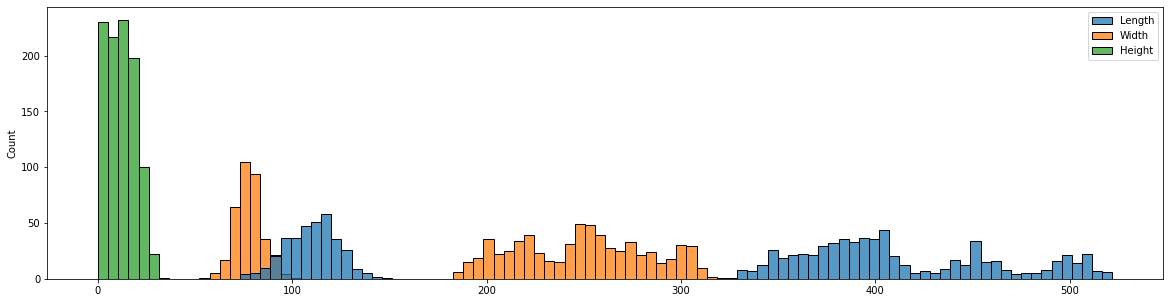

In [8]:
plt.figure(figsize=(20, 5))
sns.histplot(df_skus_fashion[['Length', 'Width', 'Height']], bins=100);

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


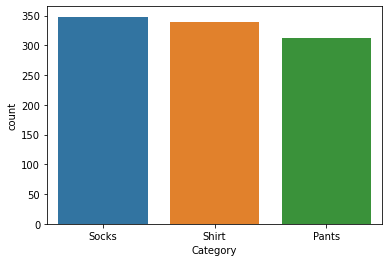

In [9]:
sns.countplot(df_skus_fashion['Category']);

In [10]:
df_skus_fashion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SKU       1000 non-null   object 
 1   Category  1000 non-null   object 
 2   Size      1000 non-null   object 
 3   Length    1000 non-null   float64
 4   Width     1000 non-null   float64
 5   Height    1000 non-null   float64
dtypes: float64(3), object(3)
memory usage: 87.0+ KB


In [11]:
df_skus_fashion.describe()

,Length,Width,Height
count,1000.000000,1000.000000,1000.000000
mean,307.498000,189.256000,11.822000
std,149.977863,86.034414,7.091587
min,75.000000,56.000000,0.000000
25%,119.000000,81.000000,6.000000
50%,372.500000,219.000000,12.000000
75%,411.000000,258.000000,17.000000
max,522.000000,321.000000,32.000000


In [12]:
df_skus_food = random_skus(1000, 'Food')
df_skus_food

,SKU,Category,Size,Length,Width,Height
1,SKU_1,Can of tuna,M,110,110,7
2,SKU_2,Bag of rice,S,540,350,250
3,SKU_3,Box of cereals,L,250,150,10
4,SKU_4,Bag of rice,S,540,350,250
5,SKU_5,Box of cereals,L,250,150,10
...,...,...,...,...,...,...
996,SKU_996,Box of cereals,L,250,150,10
997,SKU_997,Can of tuna,M,110,110,7
998,SKU_998,Box of cereals,S,250,150,10
999,SKU_999,Box of cereals,M,250,150,10


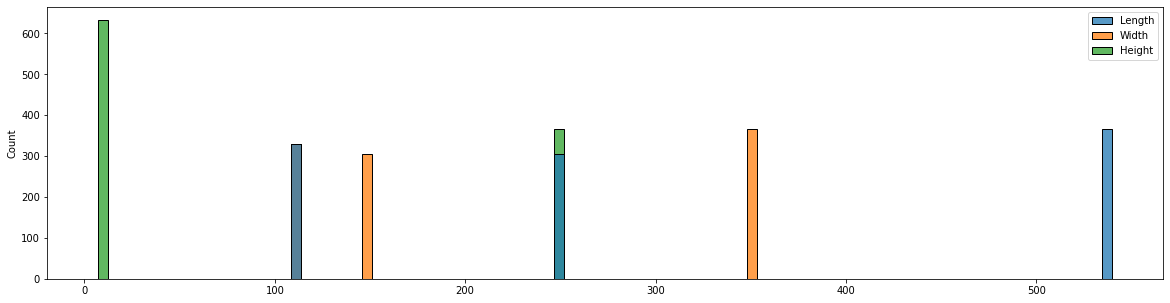

In [13]:
plt.figure(figsize=(20, 5))
sns.histplot(df_skus_food[['Length', 'Width', 'Height']], bins=100);

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


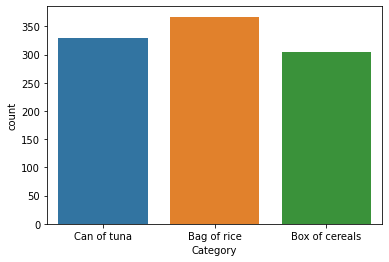

In [14]:
sns.countplot(df_skus_food['Category']);

### Notes
At this stage, the produced values are only to showcase the functionality and are not representative of real world data.
At a later time, more realistic data needs to be produced.

## Random order table generator

### Objectives
The goal is to create a function that generates a table of random orders. The order profile (units per order line, order lines per order) as well as the volume distribution of the SKUs (Pareto principle) must represent a real live scenario and must be selectable by the user.

The initial table must contain at minimum the following columns:

| Date | Order ID | SKU ID | Quantity | Order category |
| ---- | ---- | ---- | ---- | ---- |
| numerical | categorical | categorical | numerical | categorical |

### Considerations
Like in most other ares in business, the SKU-velocity distribution in a typical order profil corresponds to an 80/20, or in some cases 70/30, ratio (20% of the SKUs representing 80% of the order volume.). Based on this, SKUs will belong to velocity classes (A, B, C), depending how fast they are moving. Therefore, the available SKUs need to be assigned orders in a way that follows this rule.

<img src="https://interlakemecalux.cdnwm.com/blog/img/80-20-pareto-principle.1.2.jpg" width="650"/>

There is a specific, somewhat business-specific, order profile (units per-order line and order lines per order).



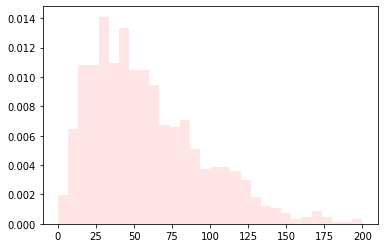

In [8]:
numValues = 1000
maxValue = 200
skewness = 10   #Negative values are left skewed, positive values are right skewed.

random = skewnorm.rvs(a = skewness,loc=maxValue, size=numValues)  #Skewnorm function

random = random - min(random)      #Shift the set so the minimum value is equal to zero.
random = random / max(random)      #Standadize all the vlues between 0 and 1. 
random = random * maxValue         #Multiply the standardized values by the maximum value.

#Plot histogram to check skewness
plt.hist(random,30,density=True, color = 'red', alpha=0.1)
plt.show()